# Unsupervised Learning - Clustering
In this section, we apply clustering algorithms to the heart disease dataset. Clustering is an unsupervised learning method used to find inherent groups or patterns in data without predefined labels. We will use K-Means clustering to explore potential clusters in the data.


## Importing Libraries and Loading Data
In this step, we import all necessary libraries for clustering, classification, and evaluation. Then, we load the cleaned and scaled dataset, extracting the features (X) for further unsupervised analysis such as clustering.



In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
import matplotlib.lines as mlines
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import adjusted_rand_score

df = pd.read_csv('../Data/selected_features_scaled.csv')
X = df.drop('target', axis=1)
X_pca = X.values 

## Applying K-Means Clustering and the Elbow Method
We use the Elbow Method to find the optimal number of clusters K by plotting inertia (sum of squared distances of samples to their closest cluster center) against different values of K. The elbow point suggests the best K value.

After determining that K=3 is appropriate, we run K-Means clustering on the PCA-transformed features and visualize the clusters on the first two principal components.

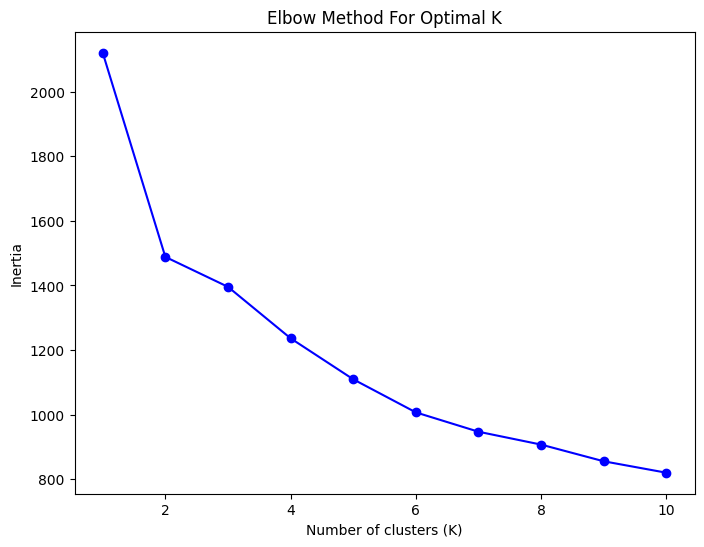

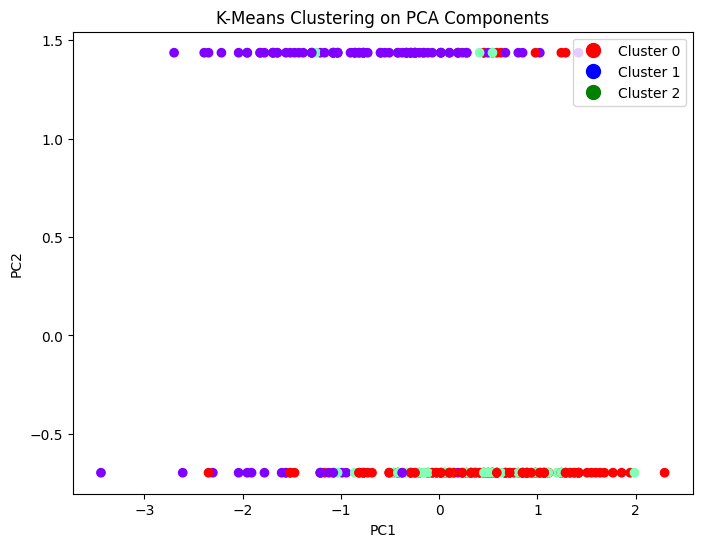

In [6]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='rainbow')

handles = [mlines.Line2D([], [], color=color, marker='o', linestyle='', markersize=10, label=f'Cluster {i}') 
           for i, color in enumerate(['red', 'blue', 'green'])]
plt.legend(handles=handles, loc='upper right')

plt.title('K-Means Clustering on PCA Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


## Hierarchical Clustering and Dendrogram Visualization
Hierarchical clustering groups data points based on their similarity without specifying the number of clusters upfront. The dendrogram visualizes this hierarchical relationship by showing how clusters are merged at different distances. We use Ward’s method to minimize variance within clusters.

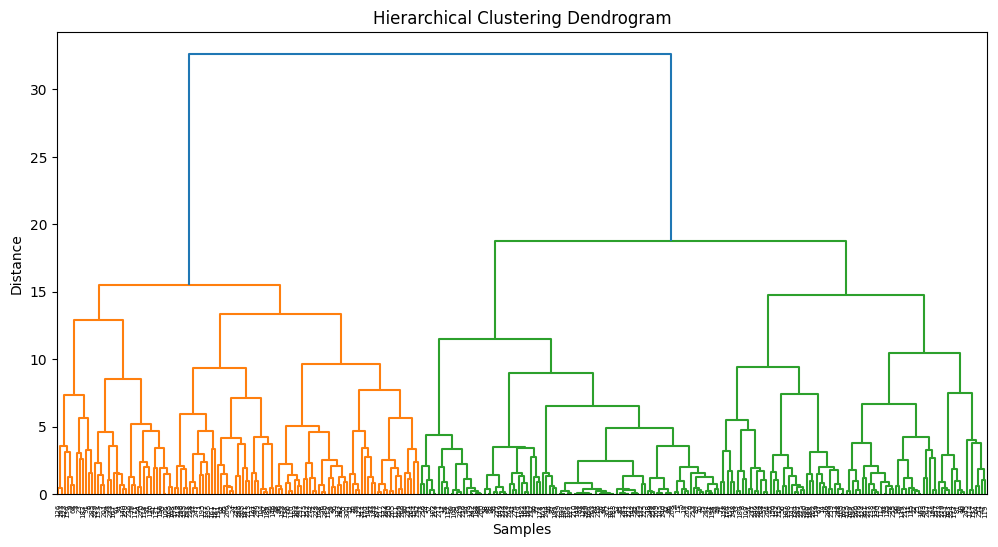

In [7]:
Z = linkage(X, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

## Cutting the Dendrogram and Comparing Clusters with True Labels
We cut the hierarchical clustering dendrogram at a specified distance threshold (max_d = 14) to obtain cluster assignments. Then, we compare these clusters to the actual target labels using a contingency table (pd.crosstab). Finally, we calculate the Adjusted Rand Index (ARI) to measure the similarity between the clustering and the true labels. The ARI ranges from -1 (no agreement) to 1 (perfect agreement).

In [8]:

y = df['target']

max_d = 14
clusters = fcluster(Z, max_d, criterion='distance')
print(pd.crosstab(clusters, y))
ari = adjusted_rand_score(y, clusters)
print("Adjusted Rand Index:", ari)

target   0   1   2   3  4
row_0                    
1       16   6   6   8  2
2       11  20  19  21  9
3       85  11   1   1  0
4       20  12   4   4  1
5       32   6   6   1  1
Adjusted Rand Index: 0.16255063379305376
